survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
raw = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')
raw.columns = pd.Series(raw.columns).apply(lambda r: r.lower())
raw.sex = raw.sex.map({'female': 0, 'male': 1})
raw[-2::]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q


In [82]:
test.columns = pd.Series(test.columns).apply(lambda r: r.lower())
test.sex = test.sex.map({'female': 0, 'male': 1})
test['survived']=[1]*len(test)
test.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",NaN,34.5,0,0,330911,7.8292,NaN,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",NaN,47.0,1,0,363272,7.0000,NaN,S,1


In [87]:
raw=np.vstack([raw,test])

In [88]:
pd.DataFrame(raw)

,0,1,2,3,4,5,6,7,8,9,10
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,C123,S
4,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,NaN,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.075,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,NaN,C


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
pclass      418 non-null int64
name        418 non-null object
sex         0 non-null float64
age         332 non-null float64
sibsp       418 non-null int64
parch       418 non-null int64
ticket      418 non-null object
fare        417 non-null float64
cabin       91 non-null object
embarked    418 non-null object
survived    418 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 39.2+ KB


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null int64
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [5]:
raw.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [6]:
age_table=raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='mean')
age_table

survived            0          1
sex pclass                      
0   1       25.666667  34.939024
    2       36.000000  28.080882
    3       23.818182  19.329787
1   1       44.581967  36.248000
    2       33.369048  16.022000
    3       27.255814  22.274211

In [7]:
raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='count')

survived      0   1
sex pclass         
0   1         3  82
    2         6  68
    3        55  47
1   1        61  40
    2        84  15
    3       215  38

<Container object of 65 artists>

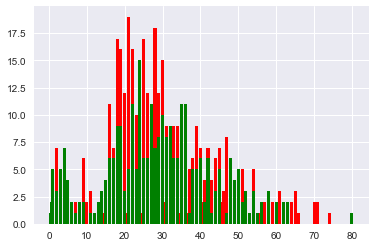

In [8]:

f1=raw[raw.survived==1].groupby(['age']).name.count()
f2=raw[raw.survived==0].groupby(['age']).name.count()
#pd.DataFrame(f1)

plt.bar(f2.index,f2,color='red')
plt.bar(f1.index,f1,color='green')


In [9]:
print raw[raw.name.str.contains('Miss')].age.mean()
print raw[raw.name.str.contains('Mrs.')].age.mean()
print raw[raw.name.str.contains('Mr.')].age.mean()
miss_age =raw[raw.name.str.contains('Miss')].age.mean()

21.7739726027
35.6428571429
33.1183953033


In [71]:
raw.age=raw.age.fillna(-1)
#raw.age=raw.age.fillna(29)
raw.cabin = raw.cabin.fillna('na') # не будем использовать
raw.embarked= raw.embarked.fillna('S') # либо С, т.к. это только пассажиры первого класса

test.age = test.age.fillna(-1)
test.cabin = test.cabin.fillna('na')
test.embarked= test.embarked.fillna('S')

In [11]:
miss_index = raw[raw.name.str.contains('Miss')][raw.age==-1].index
print len(miss_index)
for ind in miss_index:
    raw.loc[ind,'age']=miss_age
    
na_index =raw[raw.age==-1].index 
for ind in na_index:
    raw.loc[ind,'age']=age_table[raw.loc[ind].survived][raw.loc[ind].sex][raw.loc[ind].pclass]


36


C:\Users\Dima\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [12]:
raw.age.describe()

count    891.000000
mean      29.330381
std       13.357468
min        0.420000
25%       21.773973
50%       27.255814
75%       36.000000
max       80.000000
Name: age, dtype: float64

In [13]:
tmp =raw.loc[:,['survived','cabin']]
tmp['cab']=tmp.cabin.str[0]
tmp.pivot_table(index=['cab'],columns='survived', values='cabin',aggfunc='count')

survived,0,1
cab,,
A,8.0,7.0
B,12.0,35.0
C,24.0,35.0
D,8.0,25.0
E,8.0,24.0
F,5.0,8.0
G,2.0,2.0
T,1.0,NaN
n,481.0,206.0


In [14]:
num_data = raw[['pclass','sex', 'age','sibsp', 'parch','fare']]
cat_data = raw[['cabin','embarked']].drop(['cabin'],axis=1)
y=raw['survived']
cat_data.head(2)

,embarked
PassengerId,
1,S
2,C


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

C:\Users\Dima\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
scaler = StandardScaler()
transform = PolynomialFeatures(2)
encoder = DV(sparse = False)

X_s=scaler.fit_transform(num_data)
X_cat= encoder.fit_transform(cat_data.T.to_dict().values())
X_s=np.hstack([X_s,X_cat])

X_s = transform.fit_transform(X_s)
#pd.DataFrame(X)


X=X_s
pd.DataFrame(X).head(2)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.827377,0.737695,-0.549093,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,...,0.252451,-0.000000,-0.0,-0.502445,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,-1.566107,-1.355574,0.649411,0.432793,-0.473674,0.786845,1.0,0.0,0.0,...,0.619126,0.786845,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
lg=[]
xg=[]
for i in range(0,10):    
    (X_train,
    X_test,
    y_train,
    y_test)=train_test_split(X,y,test_size=0.3,stratify=y)

    xgb = XGBClassifier()
    xgb.fit(X_train,y_train)

    LG = LogisticRegression(class_weight='balanced',penalty='l1')
    LG.fit(X_train,y_train)
    
    lg.append(roc_auc_score(y_test,LG.predict(X_test)))
    xg.append(roc_auc_score(y_test,xgb.predict(X_test)))
    #print lg


print ' LG : mean {}, max {}, min {} '.format(mean(lg),max(lg),min(lg))#roc_auc_score(y_test,LG.predict(X_test)))
print ' XGB :mean {}, max {}, min {} '.format(mean(xg),max(xg),min(xg))#roc_auc_score(y_test,xgb.predict(X_test)))

 LG : mean 0.809920564872, max 0.848984995587, min 0.748308325978 
 XGB :mean 0.819296852015, max 0.87625772286, min 0.77678729038 


In [18]:
print raw.columns
pd.DataFrame(LG.coef_)


Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9
0,-0.133433,-0.943951,-1.299649,-0.683895,-0.316441,-0.128733,0.151999,0.205114,-0.229116,0.0
